In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nbformat
import warnings
warnings.filterwarnings('ignore')
import sklearn

In [2]:
df=pd.read_csv("train.csv")
df

,ID,date,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg,staff_experience,waste_category,food_waste_kg
0,0,2022-12-19,196,13,27.887273,45.362854,0,0,7.740587,intermediate,dairy,28.946465
1,1,2023-11-21,244,15,10.317872,64.430475,1,0,42.311779,NaN,MeAt,51.549053
2,4,2022-02-01,148,16,27.714300,69.046113,1,0,41.184305,Beginner,MeAt,53.008323
3,5,2023-03-19,157,19,19.173902,46.292823,6,0,41.543492,Beginner,MeAt,48.621527
4,6,2022-07-18,297,10,26.375233,79.741064,0,0,26.525097,Intermediate,MEAT,44.156984
...,...,...,...,...,...,...,...,...,...,...,...,...
906,1044,2022-03-29,395,18,17.354199,45.138435,1,0,40.550668,Intermediate,GRAINS,50.369152
907,1045,2022-11-27,483,11,24.912137,59.485091,6,0,36.470276,intermediate,dairy,43.070121
908,1046,2023-04-12,243,11,28.870945,70.508404,2,0,19.767203,Intermediate,MeAt,29.632560
909,1048,2022-02-14,406,10,19.061638,55.286642,0,0,28.560361,EXPERT,MEAT,44.615759


# EDA

In [3]:
df.head()

,ID,date,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg,staff_experience,waste_category,food_waste_kg
0,0,2022-12-19,196,13,27.887273,45.362854,0,0,7.740587,intermediate,dairy,28.946465
1,1,2023-11-21,244,15,10.317872,64.430475,1,0,42.311779,NaN,MeAt,51.549053
2,4,2022-02-01,148,16,27.714300,69.046113,1,0,41.184305,Beginner,MeAt,53.008323
3,5,2023-03-19,157,19,19.173902,46.292823,6,0,41.543492,Beginner,MeAt,48.621527
4,6,2022-07-18,297,10,26.375233,79.741064,0,0,26.525097,Intermediate,MEAT,44.156984


In [4]:
df.tail()

,ID,date,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg,staff_experience,waste_category,food_waste_kg
906,1044,2022-03-29,395,18,17.354199,45.138435,1,0,40.550668,Intermediate,GRAINS,50.369152
907,1045,2022-11-27,483,11,24.912137,59.485091,6,0,36.470276,intermediate,dairy,43.070121
908,1046,2023-04-12,243,11,28.870945,70.508404,2,0,19.767203,Intermediate,MeAt,29.632560
909,1048,2022-02-14,406,10,19.061638,55.286642,0,0,28.560361,EXPERT,MEAT,44.615759
910,1049,2024-05-10,350,6,23.708015,51.351286,4,0,46.786860,intermediate,Vegetables,57.066481


In [5]:
df.describe()

,ID,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg,food_waste_kg
count,911.000000,911.000000,911.000000,911.000000,911.000000,911.000000,911.000000,911.000000,911.000000
mean,528.327113,375.405049,11.900110,22.189280,60.761313,3.014270,0.085620,27.015691,44.842691
std,305.072794,502.812717,4.285153,8.922389,17.330821,2.009542,0.279956,12.774223,27.934366
min,0.000000,100.000000,5.000000,-10.372207,30.121111,0.000000,0.000000,5.008394,10.819048
25%,266.000000,211.000000,8.000000,15.684585,46.017835,1.000000,0.000000,16.091383,32.887912
50%,531.000000,306.000000,12.000000,22.115040,61.633960,3.000000,0.000000,26.854109,41.146930
75%,795.500000,407.000000,15.000000,28.804294,75.787910,5.000000,0.000000,38.149878,50.046681
max,1049.000000,4730.000000,19.000000,60.000000,89.982828,6.000000,1.000000,49.803703,274.328783


In [6]:
df.skew(numeric_only=True)

ID                 -0.015749
meals_served        6.581128
kitchen_staff       0.020202
temperature_C       0.111854
humidity_percent   -0.093234
day_of_week        -0.008186
special_event       2.966833
past_waste_kg       0.016268
food_waste_kg       4.990900
dtype: float64

## Dropping unnecessary data

In [7]:
ID_col=df["ID"]
df.drop(columns=["ID","date"],inplace=True)

## Checking uniques

In [8]:
n_uniques=df.nunique()
pd.DataFrame({"Dtype":df.dtypes,"Uniques value":n_uniques})

,Dtype,Uniques value
meals_served,int64,373
kitchen_staff,int64,15
temperature_C,float64,892
humidity_percent,float64,867
day_of_week,int64,7
special_event,int64,2
past_waste_kg,float64,867
staff_experience,object,4
waste_category,object,5
food_waste_kg,float64,867


In [9]:
df["waste_category"].unique()

array(['dairy', 'MeAt', 'MEAT', 'Vegetables', 'GRAINS'], dtype=object)

# handling capitalization category coloumn

In [10]:
df["waste_category"] = df["waste_category"].str.upper()
df["waste_category"].unique()

array(['DAIRY', 'MEAT', 'VEGETABLES', 'GRAINS'], dtype=object)

## cheking data type

In [11]:
dtypes=df.dtypes
dtypes

meals_served          int64
kitchen_staff         int64
temperature_C       float64
humidity_percent    float64
day_of_week           int64
special_event         int64
past_waste_kg       float64
staff_experience     object
waste_category       object
food_waste_kg       float64
dtype: object

## Checking missing values

In [12]:
nulls=df.isnull().sum()
nulls

meals_served          0
kitchen_staff         0
temperature_C         0
humidity_percent      0
day_of_week           0
special_event         0
past_waste_kg         0
staff_experience    164
waste_category        0
food_waste_kg         0
dtype: int64

## Handling missing values

In [13]:
mode_value = df["staff_experience"].mode()
mode_value

0    Beginner
Name: staff_experience, dtype: object

In [14]:
df["staff_experience"].fillna("Beginner", inplace=True)

In [15]:
df["staff_experience"].unique()

array(['intermediate', 'Beginner', 'Intermediate', 'EXPERT'], dtype=object)

# Changing Dtype

In [16]:
cat_col=["staff_experience","waste_category"]
df[cat_col]=df[cat_col].astype(("category"))
pd.DataFrame(df.dtypes).T

,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg,staff_experience,waste_category,food_waste_kg
0,int64,int64,float64,float64,int64,int64,float64,category,category,float64


## Handling capitalization

In [17]:
df["staff_experience"] = df["staff_experience"].str.upper()
df["staff_experience"].unique()

array(['INTERMEDIATE', 'BEGINNER', 'EXPERT'], dtype=object)

# Data Info

In [18]:
def data_info(data):
  cols,dtype,nulls,duplicates,uniques,min,max=[],[],[],[],[],[],[]
  for col in data.columns:
    cols.append(col)
    dtype.append(data[col].dtype)
    nulls.append(data[col].isnull().sum())
    duplicates.append(data.duplicated().sum())
    uniques.append(data[col].nunique())
    if data[col].dtype !="category":
      min.append(data[col].min())
      max.append(data[col].max())
    else:
      min.append(None)
      max.append(None)


  data=pd.DataFrame(
      {
          "Column":cols,
          "DType":dtype,
          "Min":min,
          "Max":max,
          "No of Nulls":nulls,
          "No of Uniques":uniques,
          "Duplicated rows":duplicates
      }
  )
  return data

In [19]:
data_info(df)

,Column,DType,Min,Max,No of Nulls,No of Uniques,Duplicated rows
0,meals_served,int64,100,4730,0,373,0
1,kitchen_staff,int64,5,19,0,15,0
2,temperature_C,float64,-10.372207,60.0,0,892,0
3,humidity_percent,float64,30.121111,89.982828,0,867,0
4,day_of_week,int64,0,6,0,7,0
5,special_event,int64,0,1,0,2,0
6,past_waste_kg,float64,5.008394,49.803703,0,867,0
7,staff_experience,object,BEGINNER,INTERMEDIATE,0,3,0
8,waste_category,category,None,None,0,4,0
9,food_waste_kg,float64,10.819048,274.328783,0,867,0


## Checking outliers


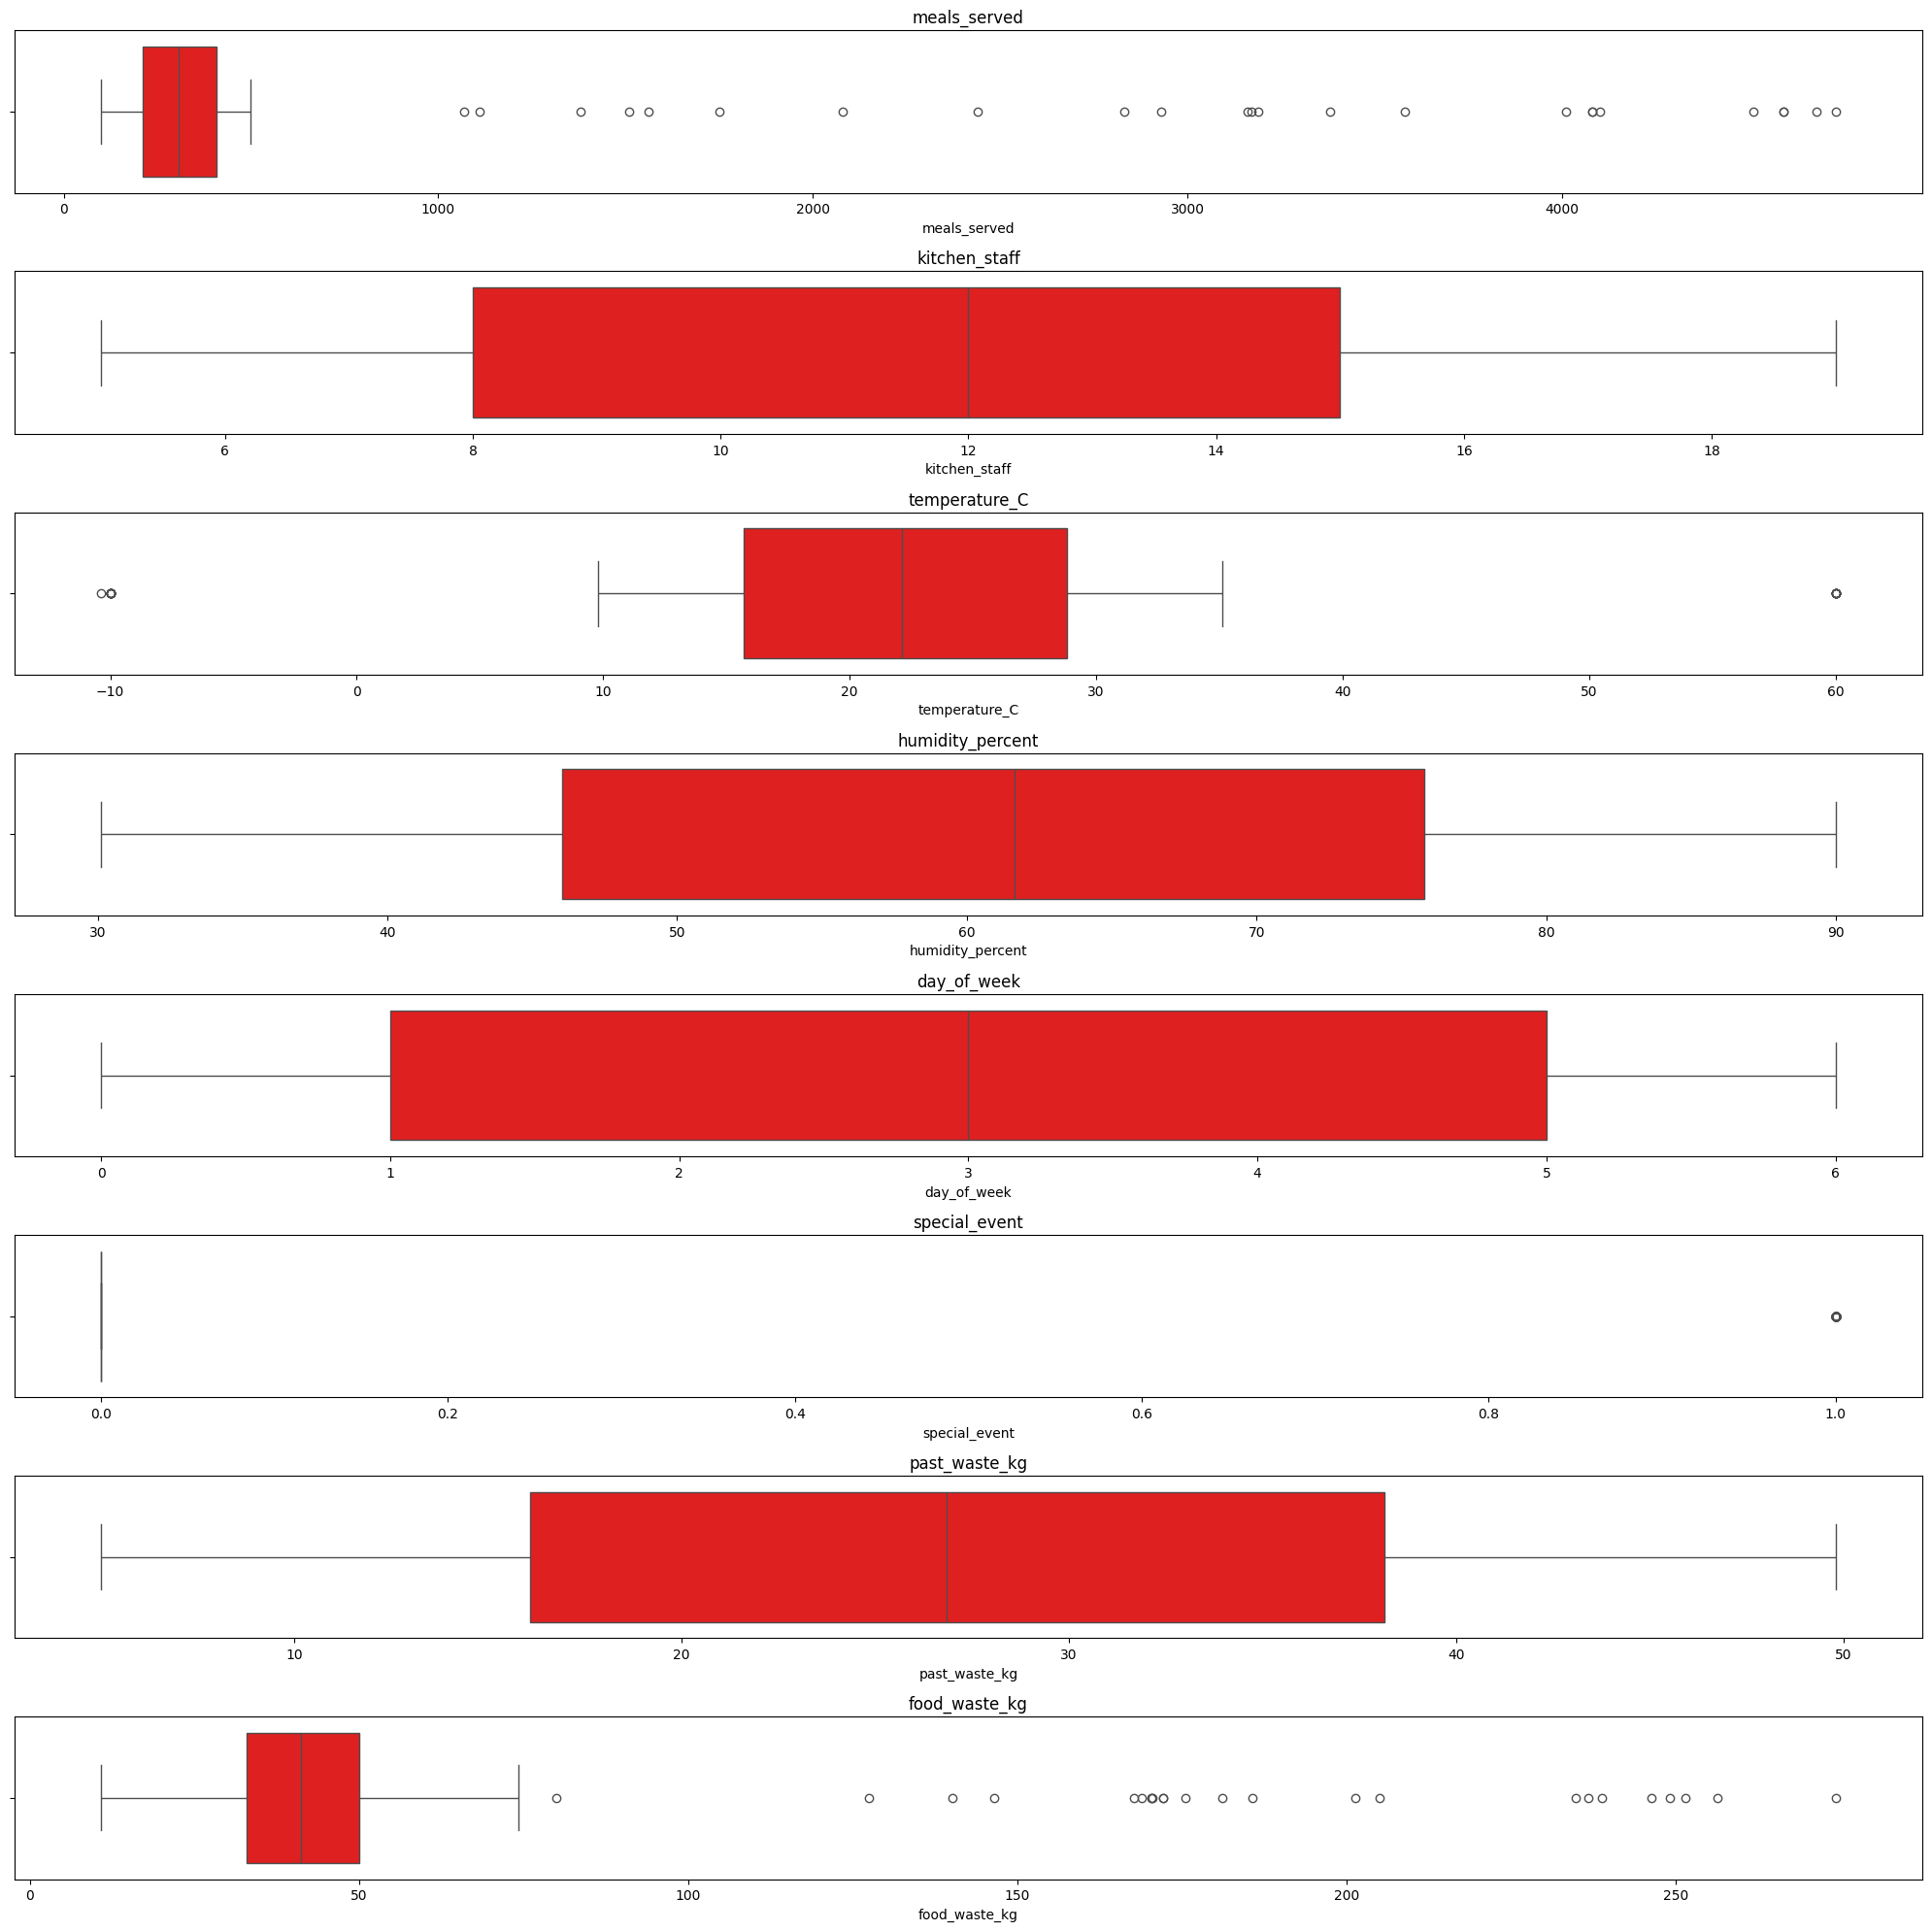

In [20]:
from Data_cleaning import DataCleaningClass
D1=DataCleaningClass()
D1.columns_boxplot(df)

## Handling temp outliers

### Temp outlier

In [21]:
Q1 = df["temperature_C"].quantile(.25)
Q3 = df["temperature_C"].quantile(.75)
IQR = Q3 - Q1
upper = Q3 + 1.5 * IQR
upper_outliers=df[df["temperature_C"]>upper]["temperature_C"].values
df[df["temperature_C"]>upper]

,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg,staff_experience,waste_category,food_waste_kg
290,259,9,60.0,52.734617,6,0,49.281418,BEGINNER,MEAT,44.955417
300,421,18,60.0,44.079207,1,0,24.268277,INTERMEDIATE,MEAT,33.139494
396,420,5,60.0,73.187487,0,0,21.827621,BEGINNER,MEAT,40.893641
404,469,12,60.0,32.537505,4,0,35.121064,BEGINNER,MEAT,67.151136
537,383,14,60.0,31.847403,1,0,6.391890,EXPERT,DAIRY,35.352474
560,286,15,60.0,53.511498,0,0,21.347276,EXPERT,DAIRY,34.982513
641,447,12,60.0,37.521389,6,0,7.453037,INTERMEDIATE,MEAT,37.225888
766,471,6,60.0,64.308550,3,1,44.209186,EXPERT,GRAINS,64.037547
804,356,13,60.0,80.635477,3,0,44.147202,INTERMEDIATE,MEAT,50.385559


In [22]:
Q1 = df["temperature_C"].quantile(.25)
Q3 = df["temperature_C"].quantile(.75)
IQR = Q3 - Q1
lower = Q3 - 1.5 * IQR
lower_outliers=df[df["temperature_C"]<lower]["temperature_C"].values
df[df["temperature_C"]<lower]

,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg,staff_experience,waste_category,food_waste_kg
12,376,19,-10.372207,54.498381,1,0,36.259420,EXPERT,MEAT,50.568699
102,134,6,-10.000000,37.796482,5,0,49.359571,BEGINNER,MEAT,36.163483
238,453,5,-10.000000,57.790363,0,1,48.434434,INTERMEDIATE,VEGETABLES,71.752271
345,472,7,-10.000000,79.081605,3,0,27.590369,EXPERT,VEGETABLES,46.991245
384,359,10,-10.000000,82.634367,1,0,47.370958,INTERMEDIATE,MEAT,70.472339
407,376,19,-10.000000,54.498381,1,0,36.259420,EXPERT,MEAT,50.568699
445,459,16,-10.000000,64.622440,6,0,30.083223,BEGINNER,MEAT,60.690374
463,341,9,-10.000000,44.349527,6,0,36.750322,EXPERT,MEAT,47.533061
492,152,14,-10.000000,82.113090,0,0,8.452527,INTERMEDIATE,GRAINS,30.175709
701,247,19,-10.000000,52.223819,6,1,12.627684,BEGINNER,DAIRY,42.581728


In [23]:
df["temperature_C"]=df["temperature_C"].replace(upper_outliers,upper)
df["temperature_C"]=df["temperature_C"].replace(lower_outliers,lower)


### Meal served oulier

In [24]:
Q1 = df["meals_served"].quantile(.25)
Q3 = df["meals_served"].quantile(.75)
IQR = Q3 - Q1
upper_meal_no = Q3 + 1.5 * IQR
upper_outliers=df[df["meals_served"]>upper_meal_no]["meals_served"].values
df[df["meals_served"]>upper_meal_no]

,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg,staff_experience,waste_category,food_waste_kg
16,1560,8,23.740401,48.599996,4,0,11.255099,EXPERT,DAIRY,127.435160
21,1110,11,15.520066,58.404053,1,0,38.878190,BEGINNER,VEGETABLES,201.327227
129,2930,19,17.929893,33.464463,2,1,20.743447,INTERMEDIATE,MEAT,246.359169
176,3160,14,29.529261,38.219944,4,1,24.266983,INTERMEDIATE,MEAT,238.887756
213,1510,11,12.434835,34.656879,3,0,47.858689,INTERMEDIATE,GRAINS,234.785567
244,1380,5,13.742599,47.550905,1,0,6.107809,INTERMEDIATE,GRAINS,69.862248
265,2440,13,15.630593,72.864646,4,0,18.923576,EXPERT,MEAT,175.507129
284,3580,7,24.943089,74.458875,5,0,23.680622,BEGINNER,MEAT,181.142320
285,2080,5,11.717821,57.494079,6,0,26.728307,BEGINNER,GRAINS,140.092944
318,1070,9,10.726785,45.168816,4,0,31.240752,BEGINNER,DAIRY,146.548799


In [25]:
df["meals_served"]=df["meals_served"].replace(upper_outliers,upper)

### Food waste outlier

In [26]:
Q1 = df["food_waste_kg"].quantile(.25)
Q3 = df["food_waste_kg"].quantile(.75)
IQR = Q3 - Q1
upper_meal_no = Q3 + 1.5 * IQR
upper_outliers=df[df["food_waste_kg"]>upper_meal_no]["food_waste_kg"].values
df[df["food_waste_kg"]>upper_meal_no]

,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg,staff_experience,waste_category,food_waste_kg
16,48.483858,8,23.740401,48.599996,4,0,11.255099,EXPERT,DAIRY,127.435160
21,48.483858,11,15.520066,58.404053,1,0,38.878190,BEGINNER,VEGETABLES,201.327227
129,48.483858,19,17.929893,33.464463,2,1,20.743447,INTERMEDIATE,MEAT,246.359169
176,48.483858,14,29.529261,38.219944,4,1,24.266983,INTERMEDIATE,MEAT,238.887756
213,48.483858,11,12.434835,34.656879,3,0,47.858689,INTERMEDIATE,GRAINS,234.785567
265,48.483858,13,15.630593,72.864646,4,0,18.923576,EXPERT,MEAT,175.507129
284,48.483858,7,24.943089,74.458875,5,0,23.680622,BEGINNER,MEAT,181.142320
285,48.483858,5,11.717821,57.494079,6,0,26.728307,BEGINNER,GRAINS,140.092944
318,48.483858,9,10.726785,45.168816,4,0,31.240752,BEGINNER,DAIRY,146.548799
321,48.483858,5,19.916494,31.645219,2,0,46.289435,EXPERT,MEAT,274.328783


In [27]:
df["food_waste_kg"]=df["food_waste_kg"].replace(upper_outliers,upper_meal_no)

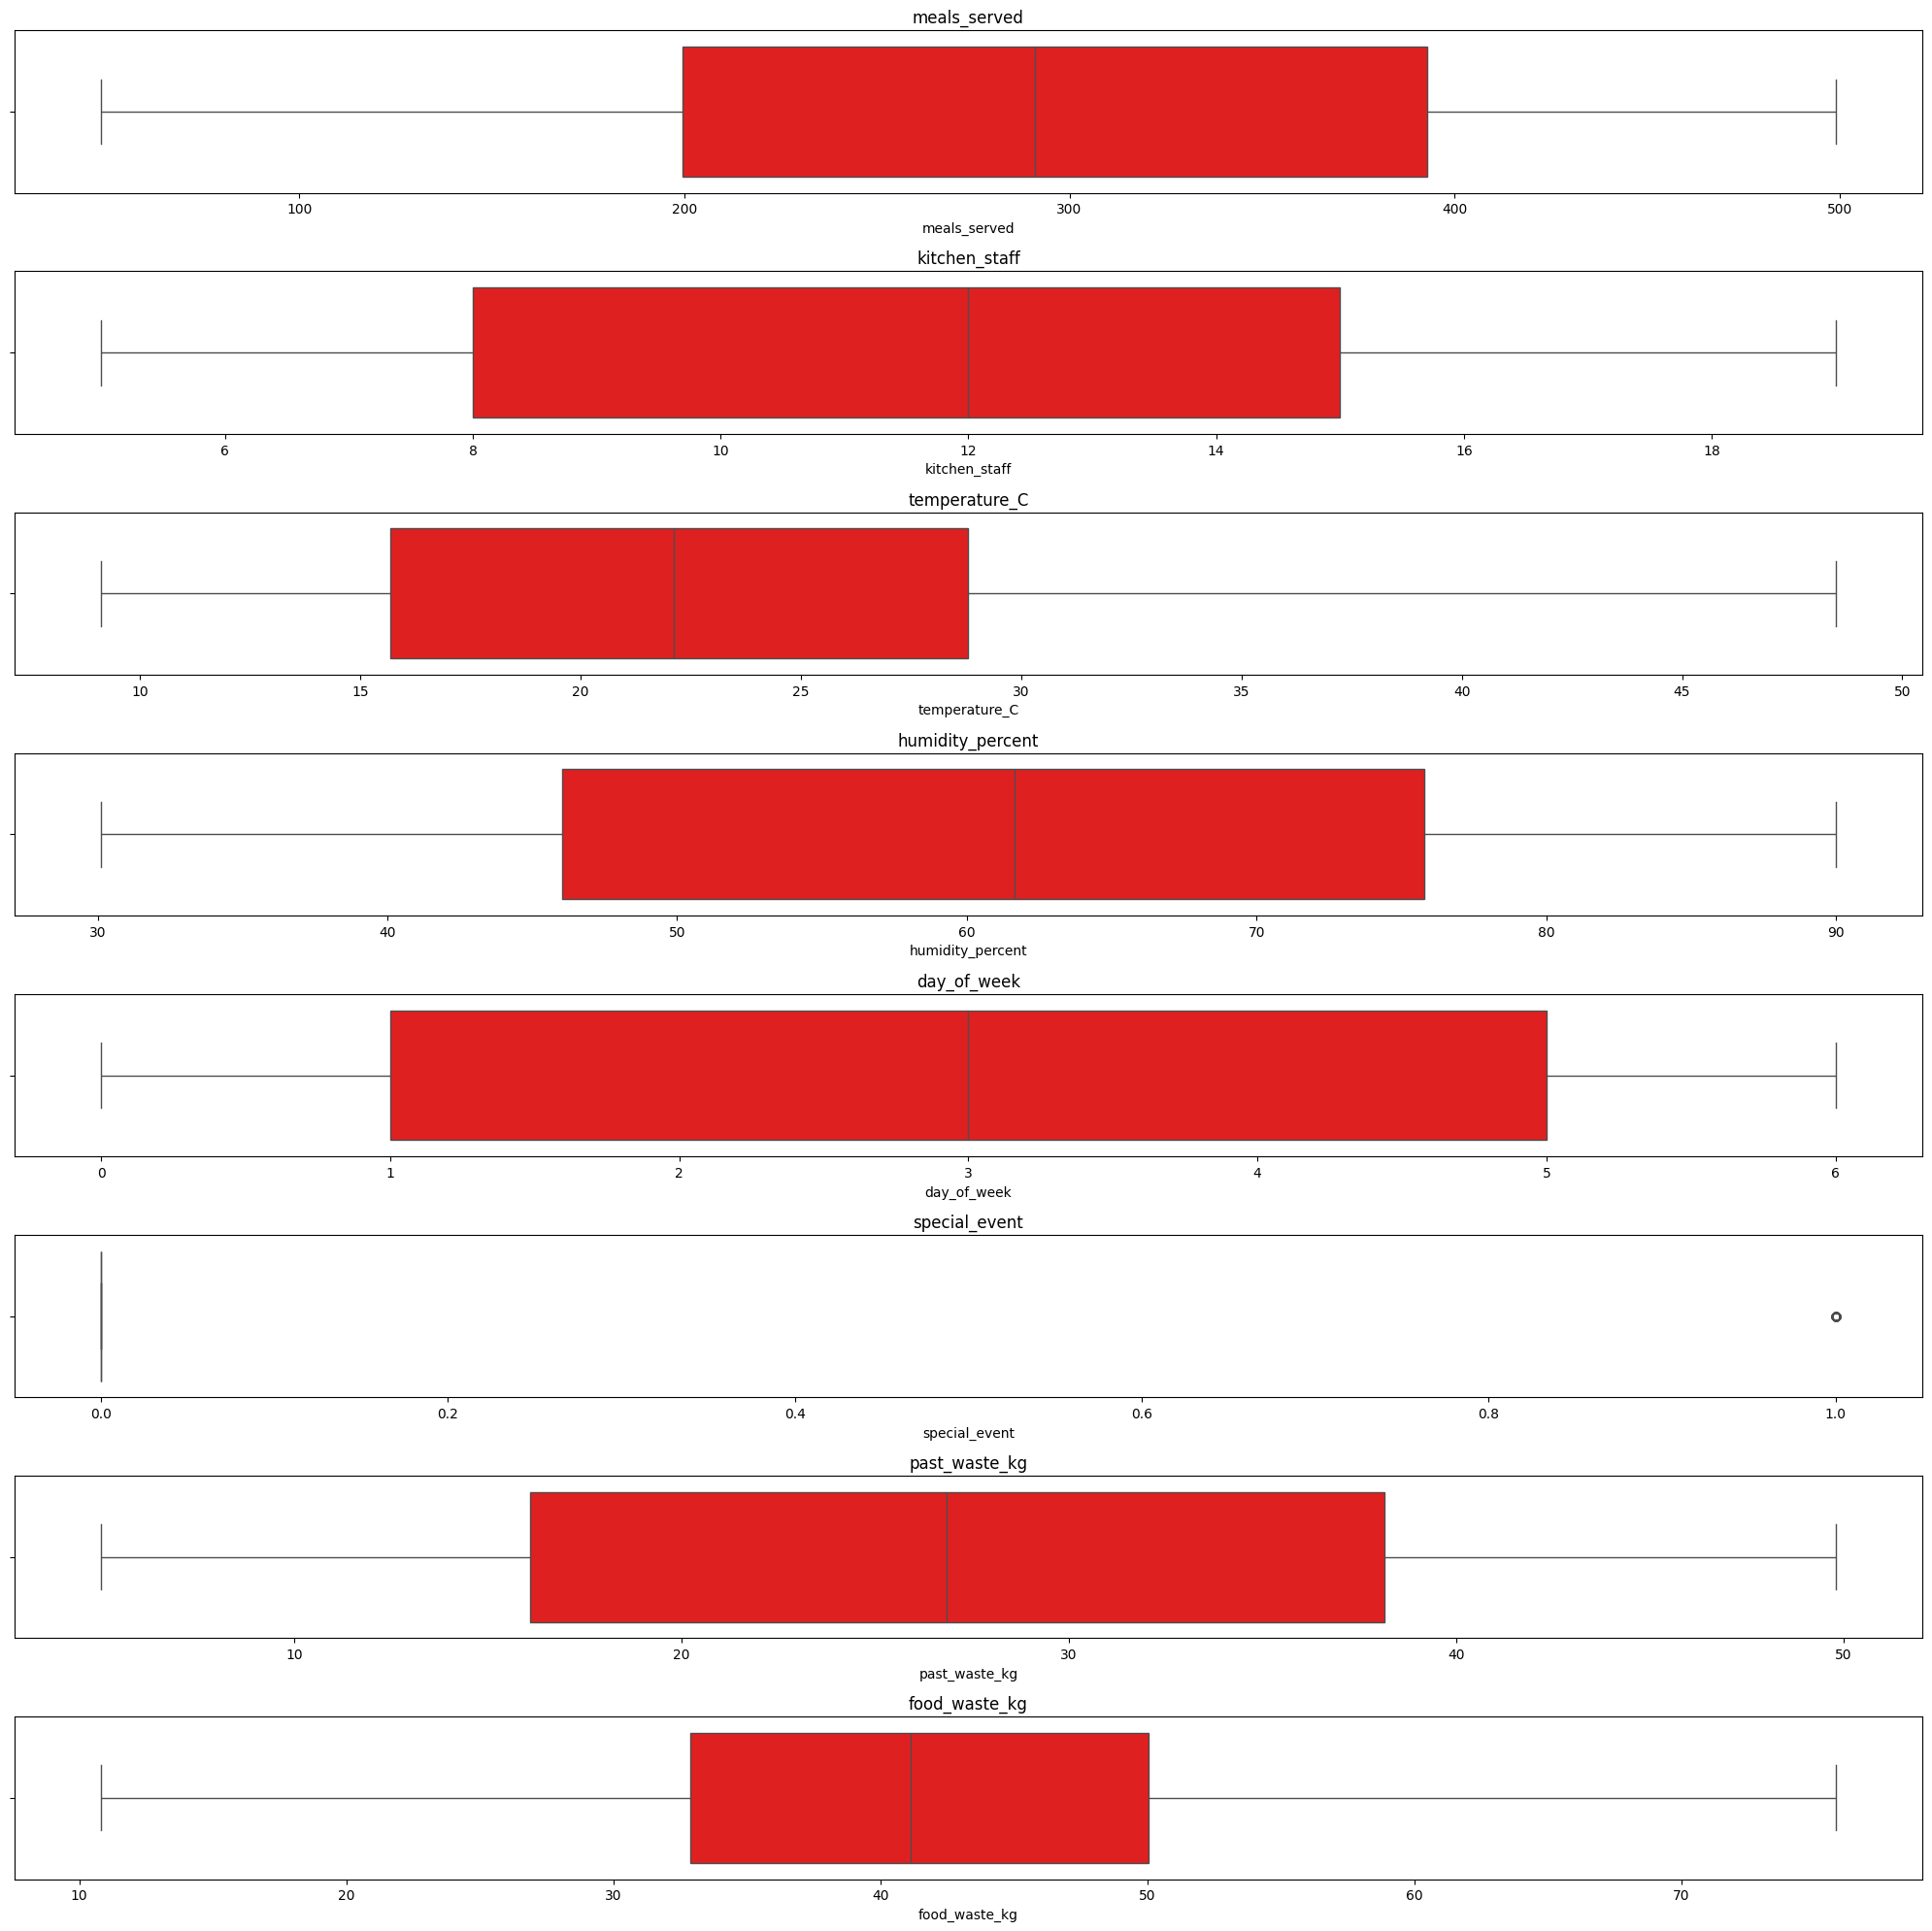

In [28]:
from Data_cleaning import DataCleaningClass
D1=DataCleaningClass()
D1.columns_boxplot(df)

# Checking duplicates

In [29]:
df.duplicated().sum()

np.int64(1)

# Handling Duplicates

In [30]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

# Correlation

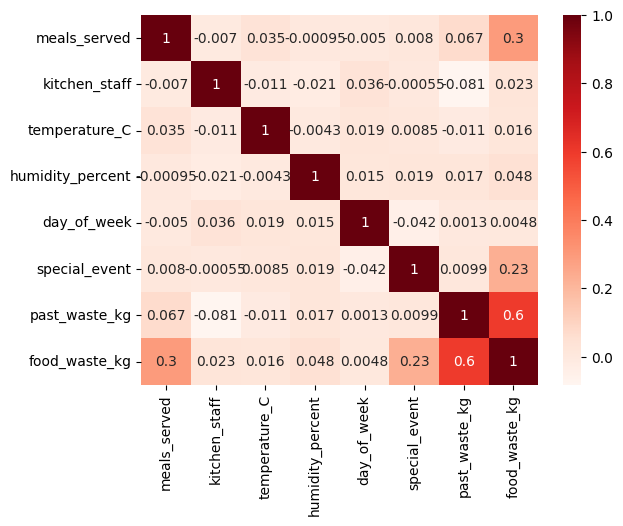

In [31]:
corr=df.corr(numeric_only=True)
sns.heatmap(corr,annot=True,cmap="Reds")
plt.show()

# Encoding

In [32]:
from sklearn.preprocessing import LabelEncoder 
encoder={}
categorical_data=["staff_experience","waste_category"]

for col in categorical_data:
    l=LabelEncoder()
    df[col]=l.fit_transform(df[col])
    encoder[col]=l

# Splitting

In [33]:
X=df.drop(columns="food_waste_kg")
y=df["food_waste_kg"]

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# Normalization

In [35]:
df.select_dtypes("number")

,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg,staff_experience,waste_category,food_waste_kg
0,196.0,13,27.887273,45.362854,0,0,7.740587,2,0,28.946465
1,244.0,15,10.317872,64.430475,1,0,42.311779,0,2,51.549053
2,148.0,16,27.714300,69.046113,1,0,41.184305,0,2,53.008323
3,157.0,19,19.173902,46.292823,6,0,41.543492,0,2,48.621527
4,297.0,10,26.375233,79.741064,0,0,26.525097,2,2,44.156984
...,...,...,...,...,...,...,...,...,...,...
906,395.0,18,17.354199,45.138435,1,0,40.550668,2,1,50.369152
907,483.0,11,24.912137,59.485091,6,0,36.470276,2,0,43.070121
908,243.0,11,28.870945,70.508404,2,0,19.767203,2,2,29.632560
909,406.0,10,19.061638,55.286642,0,0,28.560361,1,2,44.615759


In [36]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler
scaler=MinMaxScaler()

X_train[["meals_served","kitchen_staff","temperature_C","humidity_percent","past_waste_kg"]]=scaler.fit_transform(X_train[["meals_served","kitchen_staff","temperature_C","humidity_percent","past_waste_kg"]])
X_test[["meals_served","kitchen_staff","temperature_C","humidity_percent","past_waste_kg"]]=scaler.transform(X_test[["meals_served","kitchen_staff","temperature_C","humidity_percent","past_waste_kg"]])

# Modeling

In [37]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

xgb_model = XGBRegressor(objective="reg:squarederror", n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)

print(f"Mean abs error: {mae_xgb}, R2 score: {r2_score(y_test, y_pred_xgb)}, mse: {mean_squared_error(y_test, y_pred_xgb)}")

Mean abs error: 4.2514307600202805, R2 score: 0.817895429689034, mse: 29.35069180649574


In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)

print(f"Mean abs error: {mae_rf}, R2 score: {r2_score(y_test, y_pred_rf)}, mse: {mean_squared_error(y_test, y_pred_rf)}")


Mean abs error: 4.030768040231179, R2 score: 0.8353678879502635, mse: 26.534569527678187


# Loading test data

In [39]:
test_data=pd.read_csv("test.csv")
test_data

,ID,date,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg,staff_experience,waste_category
0,0,2022-12-19,196,13,27.887273,45.362854,0,0,7.740587,intermediate,dairy
1,1,2023-11-21,244,15,10.317872,64.430475,1,0,42.311779,NaN,MeAt
2,4,2022-02-01,148,16,27.714300,69.046113,1,0,41.184305,Beginner,MeAt
3,5,2023-03-19,157,19,19.173902,46.292823,6,0,41.543492,Beginner,MeAt
4,6,2022-07-18,297,10,26.375233,79.741064,0,0,26.525097,Intermediate,MEAT
...,...,...,...,...,...,...,...,...,...,...,...
906,1044,2022-03-29,395,18,17.354199,45.138435,1,0,40.550668,Intermediate,GRAINS
907,1045,2022-11-27,483,11,24.912137,59.485091,6,0,36.470276,intermediate,dairy
908,1046,2023-04-12,243,11,28.870945,70.508404,2,0,19.767203,Intermediate,MeAt
909,1048,2022-02-14,406,10,19.061638,55.286642,0,0,28.560361,EXPERT,MEAT


In [40]:
ID_test_col=test_data["ID"]
test_data.drop(columns=["ID","date"],inplace=True)

In [41]:
test_data["waste_category"].unique()

array(['dairy', 'MeAt', 'MEAT', 'Vegetables', 'GRAINS'], dtype=object)

# test capitalization handling

In [42]:
test_data["waste_category"] = test_data["waste_category"].str.upper()
test_data["waste_category"].unique()

array(['DAIRY', 'MEAT', 'VEGETABLES', 'GRAINS'], dtype=object)

# Test missing data

In [43]:
test_data["staff_experience"].fillna("Beginner", inplace=True)
test_data["staff_experience"] = test_data["staff_experience"].str.upper()
test_data["staff_experience"].unique()

array(['INTERMEDIATE', 'BEGINNER', 'EXPERT'], dtype=object)

In [44]:
cat_col=["staff_experience","waste_category"]
test_data[cat_col]=test_data[cat_col].astype(("category"))
pd.DataFrame(test_data.dtypes).T

,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg,staff_experience,waste_category
0,int64,int64,float64,float64,int64,int64,float64,category,category


# Temp outlier

In [45]:
Q1 = test_data["temperature_C"].quantile(.25)
Q3 = test_data["temperature_C"].quantile(.75)
IQR = Q3 - Q1
upper = Q3 + 1.5 * IQR
upper_outliers=test_data[test_data["temperature_C"]>upper]["temperature_C"].values
test_data[test_data["temperature_C"]>upper]

,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg,staff_experience,waste_category
290,259,9,60.0,52.734617,6,0,49.281418,BEGINNER,MEAT
300,421,18,60.0,44.079207,1,0,24.268277,INTERMEDIATE,MEAT
396,420,5,60.0,73.187487,0,0,21.827621,BEGINNER,MEAT
404,469,12,60.0,32.537505,4,0,35.121064,BEGINNER,MEAT
537,383,14,60.0,31.847403,1,0,6.391890,EXPERT,DAIRY
560,286,15,60.0,53.511498,0,0,21.347276,EXPERT,DAIRY
641,447,12,60.0,37.521389,6,0,7.453037,INTERMEDIATE,MEAT
766,471,6,60.0,64.308550,3,1,44.209186,EXPERT,GRAINS
804,356,13,60.0,80.635477,3,0,44.147202,INTERMEDIATE,MEAT


In [46]:
Q1 = test_data["temperature_C"].quantile(.25)
Q3 = test_data["temperature_C"].quantile(.75)
IQR = Q3 - Q1
lower = Q3 - 1.5 * IQR
lower_outliers=test_data[test_data["temperature_C"]<lower]["temperature_C"].values
test_data[test_data["temperature_C"]<lower]

,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg,staff_experience,waste_category
12,376,19,-10.372207,54.498381,1,0,36.259420,EXPERT,MEAT
102,134,6,-10.000000,37.796482,5,0,49.359571,BEGINNER,MEAT
238,453,5,-10.000000,57.790363,0,1,48.434434,INTERMEDIATE,VEGETABLES
345,472,7,-10.000000,79.081605,3,0,27.590369,EXPERT,VEGETABLES
384,359,10,-10.000000,82.634367,1,0,47.370958,INTERMEDIATE,MEAT
407,376,19,-10.000000,54.498381,1,0,36.259420,EXPERT,MEAT
445,459,16,-10.000000,64.622440,6,0,30.083223,BEGINNER,MEAT
463,341,9,-10.000000,44.349527,6,0,36.750322,EXPERT,MEAT
492,152,14,-10.000000,82.113090,0,0,8.452527,INTERMEDIATE,GRAINS
701,247,19,-10.000000,52.223819,6,1,12.627684,BEGINNER,DAIRY


In [47]:
test_data["temperature_C"]=test_data["temperature_C"].replace(upper_outliers,upper)
test_data["temperature_C"]=test_data["temperature_C"].replace(lower_outliers,lower)


# food test outlier

In [48]:
Q1 = test_data["meals_served"].quantile(.25)
Q3 = test_data["meals_served"].quantile(.75)
IQR = Q3 - Q1
upper_meal_no = Q3 + 1.5 * IQR
upper_outliers=test_data[test_data["meals_served"]>upper_meal_no]["meals_served"].values
test_data[test_data["meals_served"]>upper_meal_no]

,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg,staff_experience,waste_category
16,1560,8,23.740401,48.599996,4,0,11.255099,EXPERT,DAIRY
21,1110,11,15.520066,58.404053,1,0,38.878190,BEGINNER,VEGETABLES
129,2930,19,17.929893,33.464463,2,1,20.743447,INTERMEDIATE,MEAT
176,3160,14,29.529261,38.219944,4,1,24.266983,INTERMEDIATE,MEAT
213,1510,11,12.434835,34.656879,3,0,47.858689,INTERMEDIATE,GRAINS
244,1380,5,13.742599,47.550905,1,0,6.107809,INTERMEDIATE,GRAINS
265,2440,13,15.630593,72.864646,4,0,18.923576,EXPERT,MEAT
284,3580,7,24.943089,74.458875,5,0,23.680622,BEGINNER,MEAT
285,2080,5,11.717821,57.494079,6,0,26.728307,BEGINNER,GRAINS
318,1070,9,10.726785,45.168816,4,0,31.240752,BEGINNER,DAIRY


In [49]:
test_data["meals_served"]=test_data["meals_served"].replace(upper_outliers,upper)

# Label encoding

# Encoding

In [50]:
from sklearn.preprocessing import LabelEncoder 
encoder={}
categorical_data=["staff_experience","waste_category"]

for col in categorical_data:
    l=LabelEncoder()
    test_data[col]=l.fit_transform(test_data[col])
    encoder[col]=l

# Normalization

In [51]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler
scaler=MinMaxScaler()

test_data[["meals_served","kitchen_staff","temperature_C","humidity_percent","past_waste_kg"]]=scaler.fit_transform(test_data[["meals_served","kitchen_staff","temperature_C","humidity_percent","past_waste_kg"]])

# Prediction result

In [52]:
y_pred_result = rf_model.predict(test_data)
y_pred_result

array([27.35417414, 50.50148456, 51.47452083, 46.97244978, 44.06495961,
       26.74706767, 48.87166783, 62.83833526, 41.26621003, 35.05014743,
       61.27870761, 44.75418425, 49.62476101, 57.67744433, 52.41185725,
       39.33817809, 75.78483468, 31.18037063, 29.664313  , 21.76041246,
       33.31840398, 75.78483468, 48.02344551, 46.14288186, 55.19567067,
       44.71564223, 40.20589806, 42.60090393, 27.4370141 , 50.99280003,
       57.01635893, 26.5400479 , 21.465731  , 22.54151892, 43.60472591,
       54.99115381, 43.35149043, 34.75113398, 39.01047905, 37.82660992,
       47.88981537, 52.96300742, 28.4163473 , 41.16143409, 43.68287027,
       40.40146065, 44.61403826, 32.41114634, 61.11616229, 44.48172156,
       27.99654039, 60.82266218, 32.99554274, 53.11697238, 22.27551082,
       40.1256911 , 36.85909539, 49.23410305, 41.68173819, 28.80476757,
       34.50151526, 24.34562671, 52.28171715, 24.82956623, 51.49299168,
       40.31182484, 49.72377616, 36.61760078, 41.66024937, 31.53

In [53]:
# Add the ID column to predictions
results = pd.DataFrame({
    "ID": ID_test_col,  # Restore the ID column
    "Predicted_Waste_kg": y_pred_result  # Your model's predictions
})

print(results.head())

   ID  Predicted_Waste_kg
0   0           27.354174
1   1           50.501485
2   4           51.474521
3   5           46.972450
4   6           44.064960


In [54]:
from IPython.display import FileLink

results.to_csv("result.csv", index=False)
FileLink("result.csv")

d:\Abdelrahman\Amit\Machine learning\Assignments\messy food data prediction\result.csv